### Student Performance Indicator
#### Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

### 1) Problem statement
This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
1. Dataset Source - stud.csv
2. The data consists of 8 columns and 1000 rows.

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the CSV.


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
### Show Top 5 records.
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset.


In [6]:
df.shape

(1000, 8)

### Dataset Information
1. gender - sex of students(Male/Female)
2. race/ethnicity - ethnicity of students(Group A, B, C, D, E)
3. parental level of education: parent's final education(Bachelor's degree, some college, master's degress, associates degree, high school)
4. lunch: having lunch before test(standard or free/reduced)
5. test preapration course: complete or not complete before test
6. math score
7. reading_score
8. writing_score   

### Data Checks to perform
1. Check missing values
2. Check Duplicates
3. Check datatype
4. Check the number of unique values of each column
5. Check statistics of dataset
6. Check various categories present in the different categorical column  


#### Check Missing values.

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are mo missing values in the dataset.

### Check Duplicates.

In [12]:
print(df.duplicated().sum())

0


#### There are no duplicate values in the dataset.

#### Check data types

In [24]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the number of unique values of each column.


In [25]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of dataset.


In [27]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05.
2. All standard deviates are so close - between 14.6 and 15.19
3. While there is a minimum score of 0 for math, for writing, minimum is much higher - 10 and for reading, much higher - 17 

### Exploring data.

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
print("Categories in gender variable: ",df['gender'].unique())
print("Categories in race_ethnicity: ", df['race_ethnicity'].unique())
print("Categories in parental_level_of_education: ", df['parental_level_of_education'].unique())
print("Categories in lunch: ", df['lunch'].unique())
print("Categories in test_preparation_course", df['test_preparation_course'].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course ['none' 'completed']


In [32]:
#List the numerical and categorical features in the dataset.
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [33]:
print('We have following numerical features: ', numerical_features)
print('We have following categorical features: ', categorical_features)

We have following numerical features:  ['math_score', 'reading_score', 'writing_score']
We have following categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [36]:
### Adding columns for 'Total Score' and 'Average'. There are the dependent/output features in the dataset.
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [50]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()


In [51]:
print(f'Number of students with full marks in maths: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [53]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()


In [54]:
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less thatn 20 marks in maths: {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less thatn 20 marks in maths: 4


##### Insights

From above values, we get students have performed worst in Maths.
Best performance is in reading section.


### Exploring Data(Visualization)


#### Visualize average score distribution to make some conclusion
1. Histogram
2. Kernel Density Estimation(KDE)

#### Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

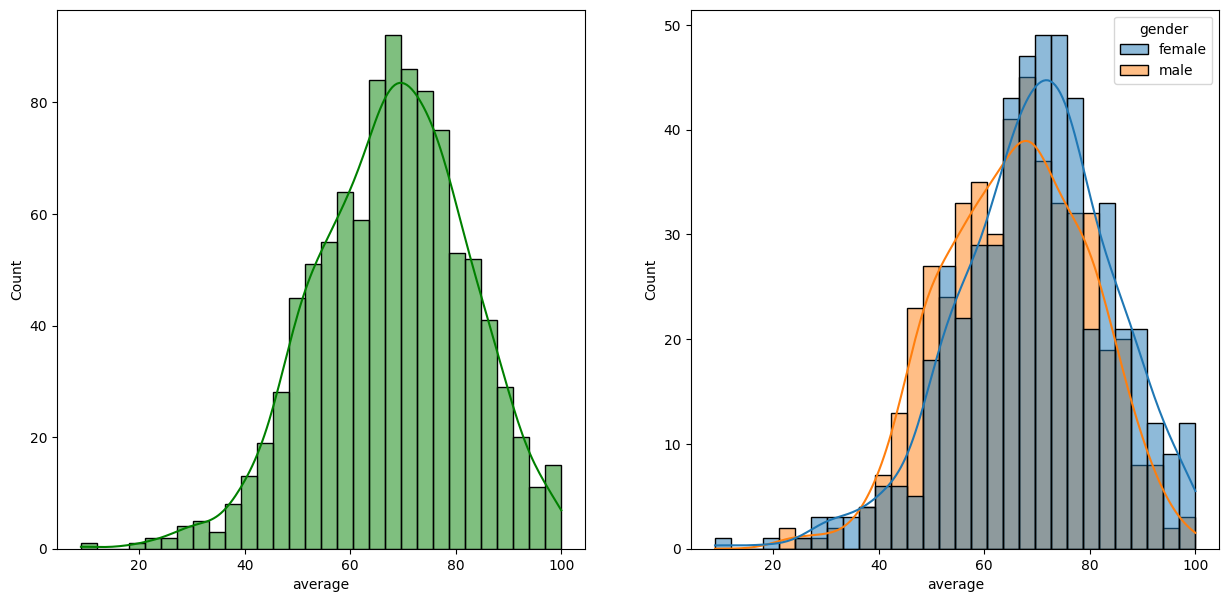

In [60]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', hue='gender')


<Axes: xlabel='total_score', ylabel='Count'>

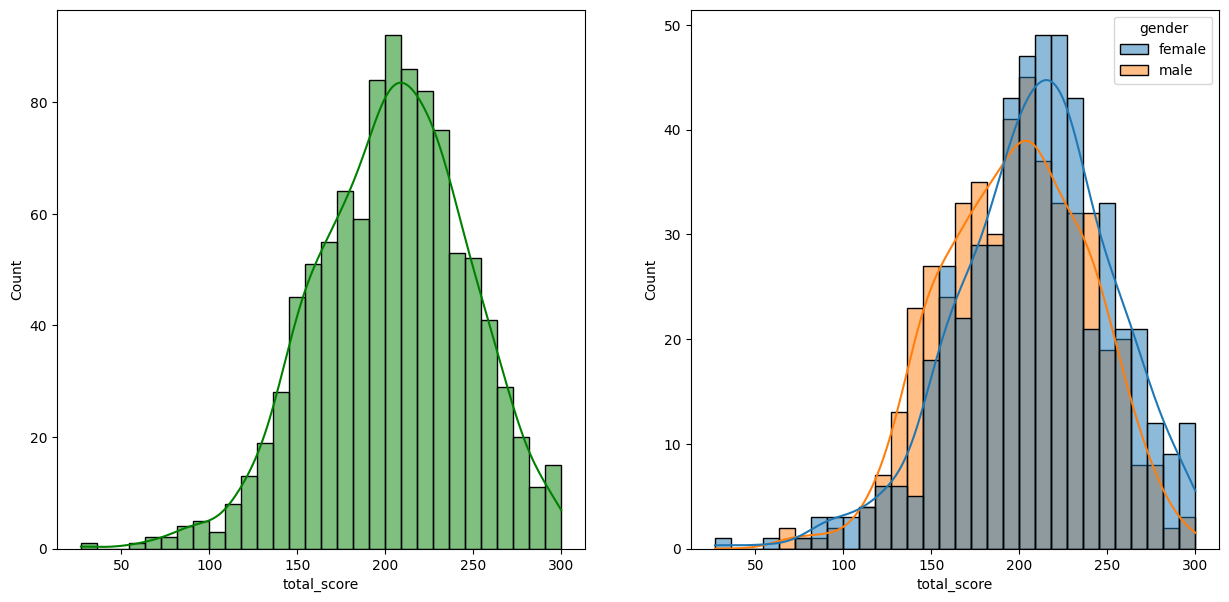

In [61]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', hue='gender')


#### Insights
More number of female students perform well than male students.

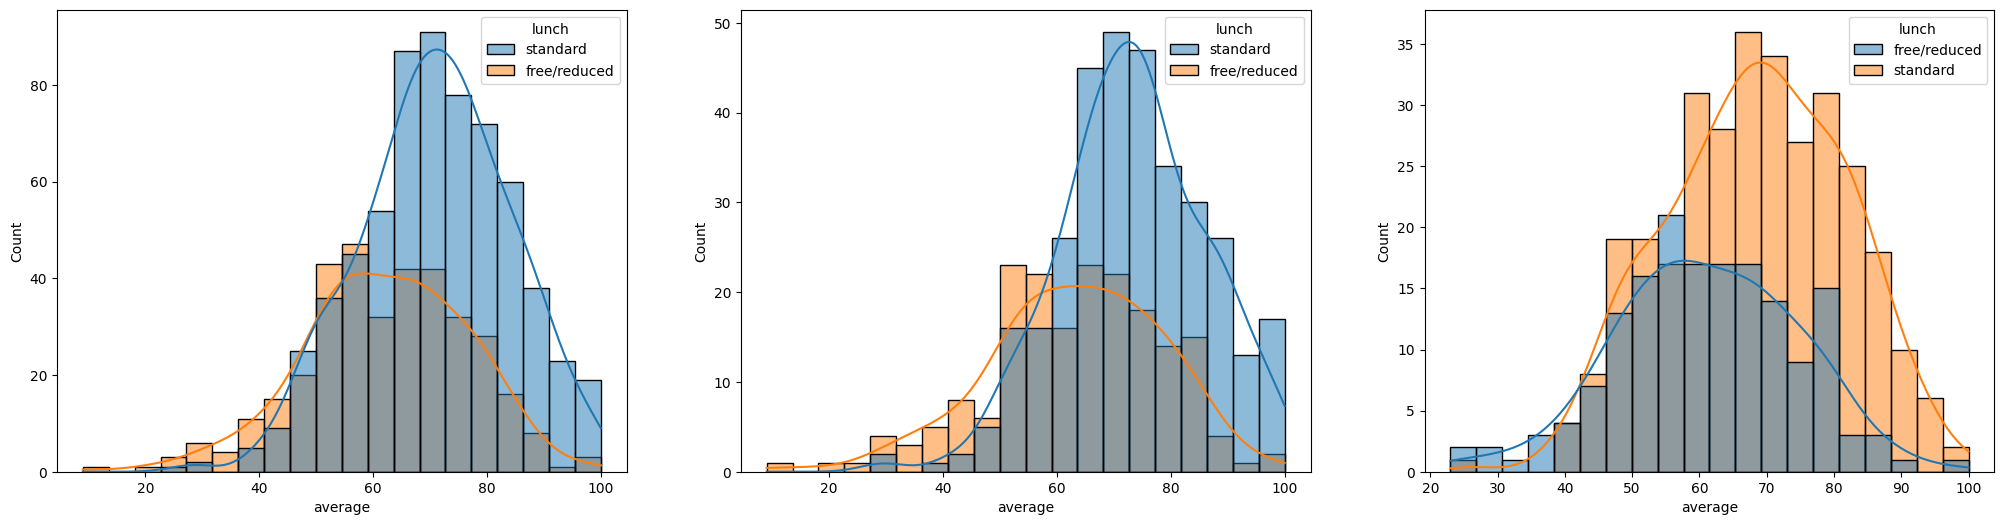

In [71]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average',bins=20, kde=True, hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', bins=20, kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', bins=20, kde=True, hue='lunch')
plt.show()

#### Insights
1. Standard lunch helps perform well in exams.
2. Standard lunch helps perform well in exams regardless of male or female.


In [73]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

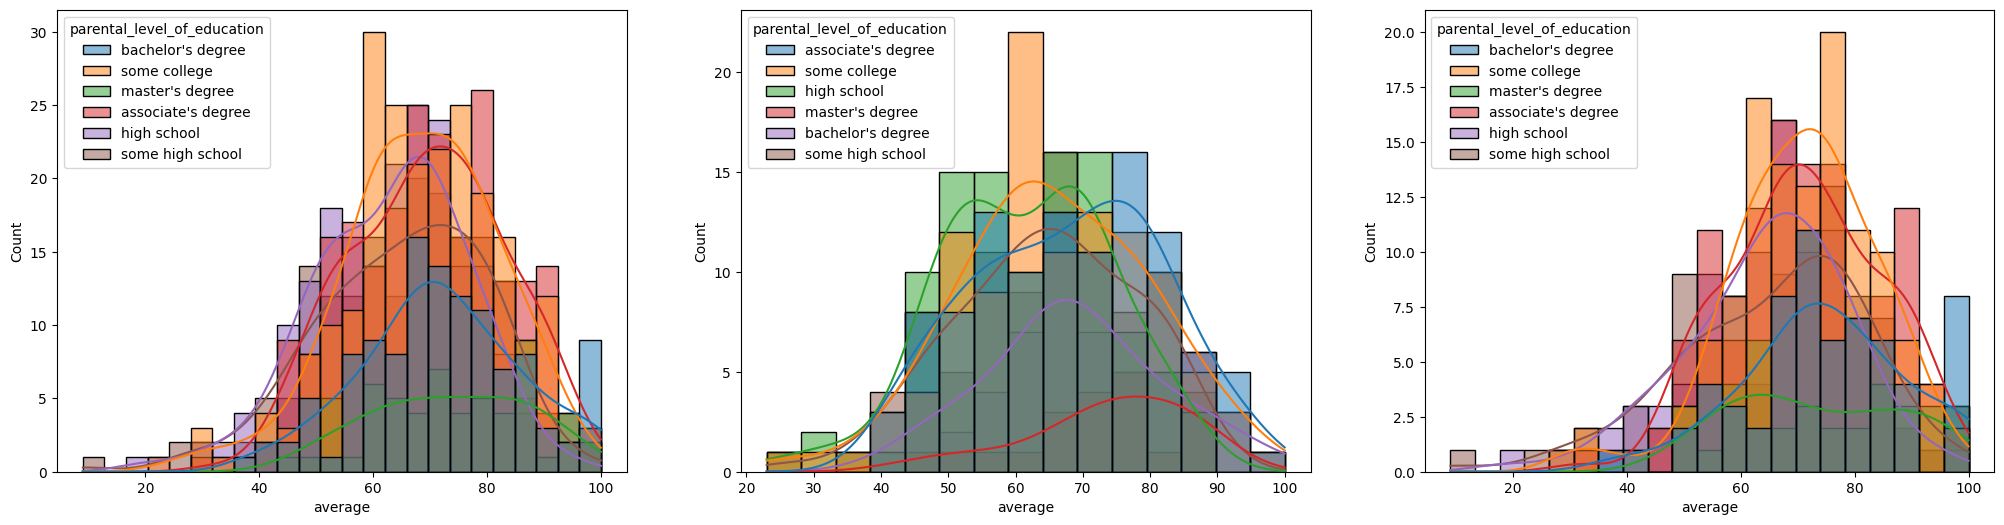

In [78]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
In general parent's education dont help student perform well in exam.


plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, bins=10, hue='race_ethnicity', multiple='dodge')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], bins=10, x='average', kde=True, hue='race_ethnicity', multiple='dodge')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'female'], bins=10, x='average', kde=True, hue='race_ethnicity', multiple='dodge')
plt.show()

#### Insights
Regardless of male or female Group A and group B is not performing well in exam.

### Maximum score of students in all three subjects.

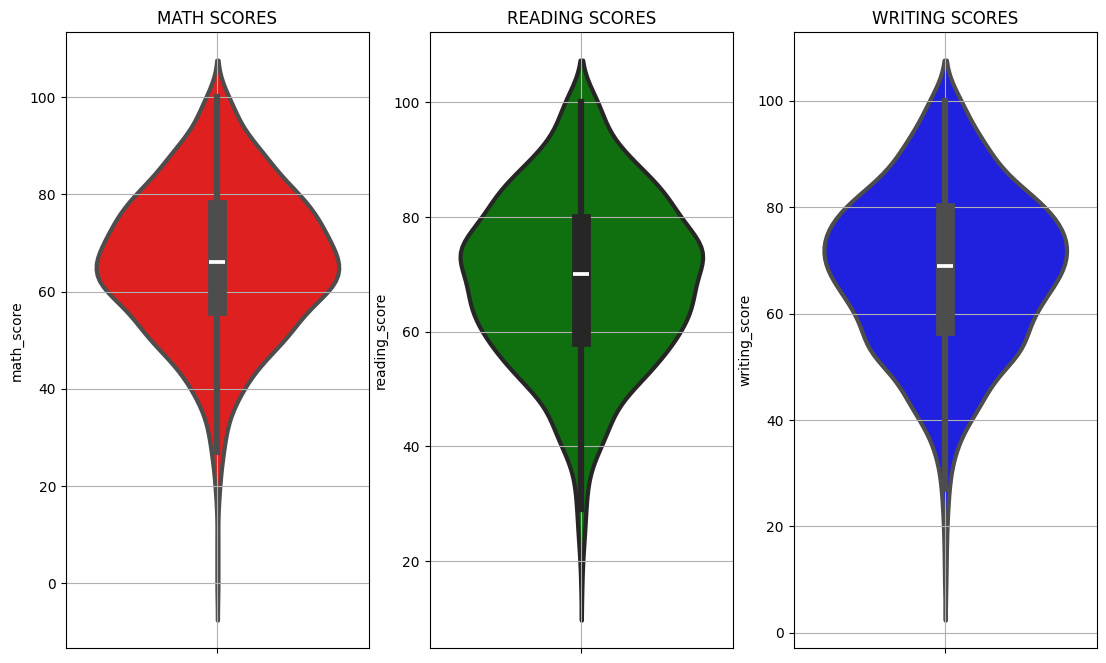

In [92]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.grid()
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.grid()
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.grid()
plt.show()

In [94]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

#### Insights
From the above charts, most of the students score in between 60-80 in Maths whereas in reading and writing most of the students
score between 50-80


### Multivariate analysis using pieplot

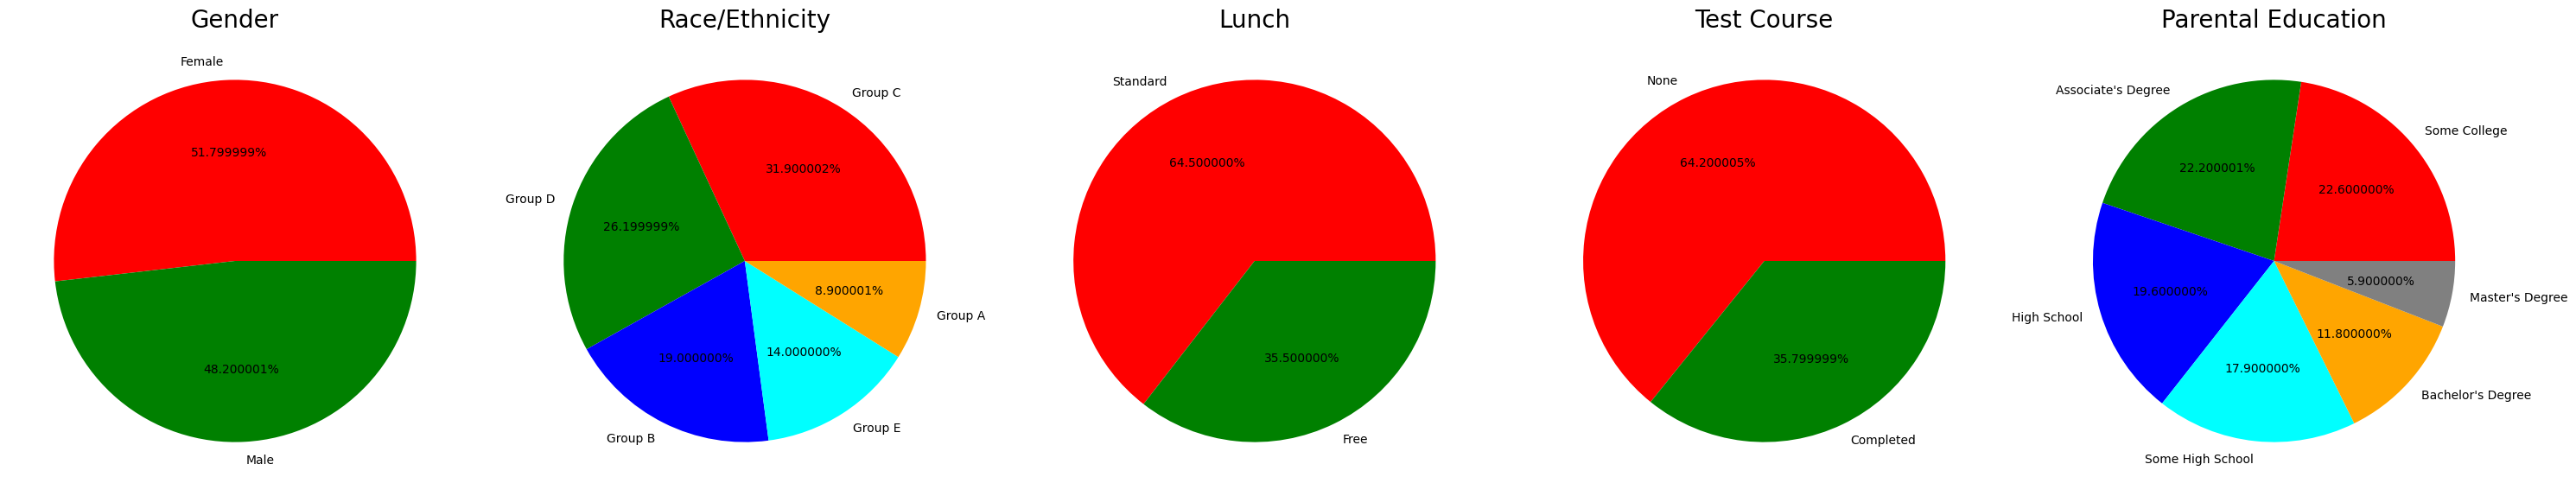

In [99]:
#To set the default size of all the plots.
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#### Insights
1. Number of male and female students are closed to equal.
2. Number of Group C students are in higher side.
3. Number of students having stndard lunch is higher
4. Number of students have not enrolle for the test preparation course is higher
5. Number of students who have their parental education is either'some college' or 'Associate Degree' are higher.




### Featurewise Visualization.

### Gender Column

1. How is distribution of Gender.
2. Is Gender has any impact on students performance?.

#### UNIVARAITE ANALYSIS(How is distribution of Gender?)


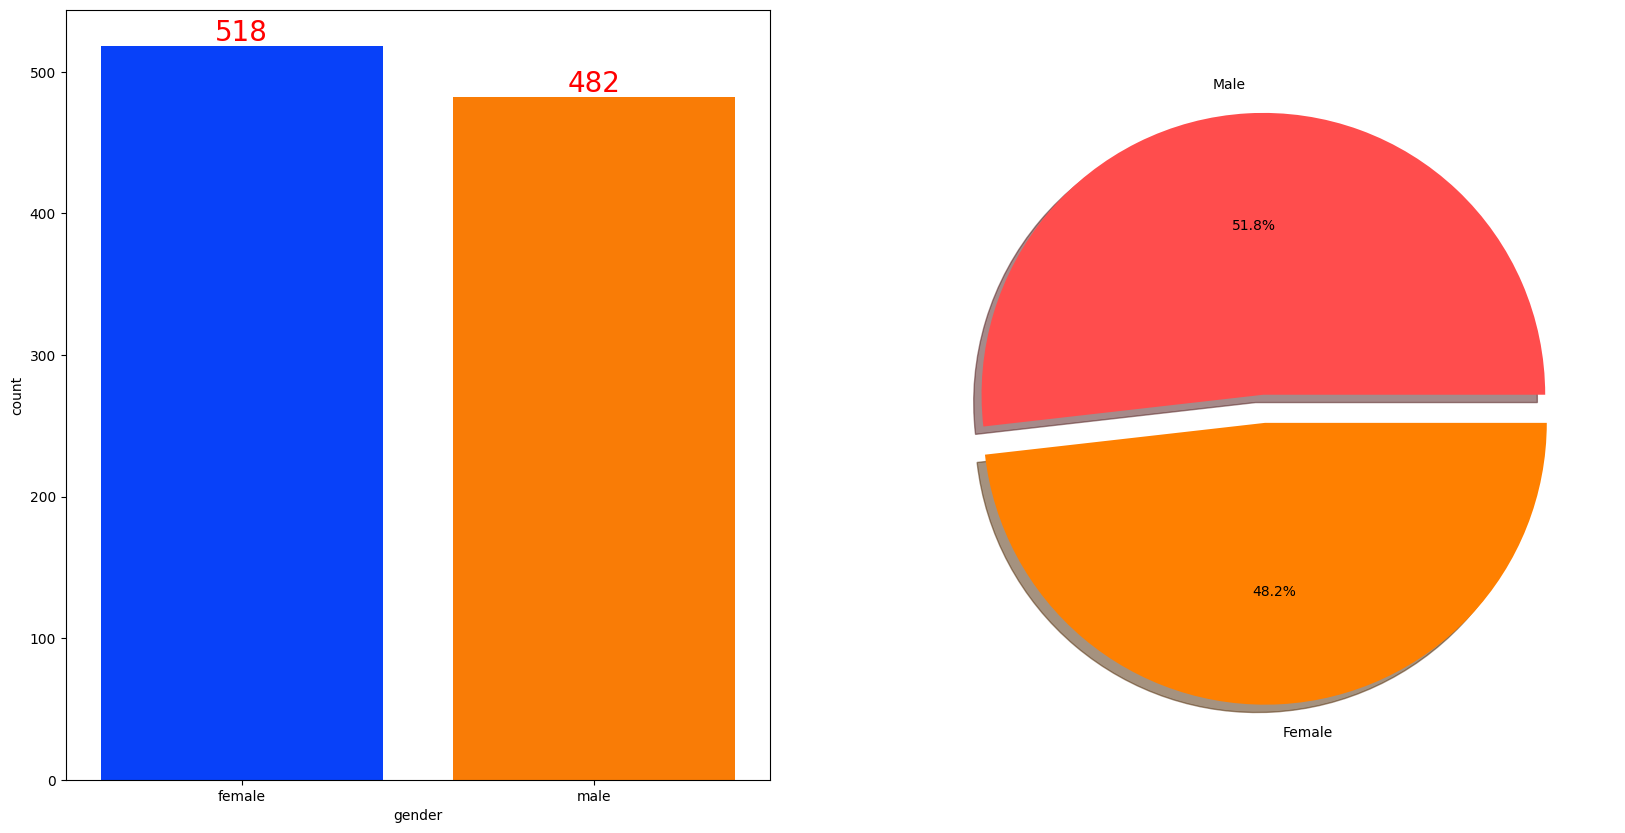

In [120]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='red',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
Gender has balanced data between male and female students.

### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [123]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


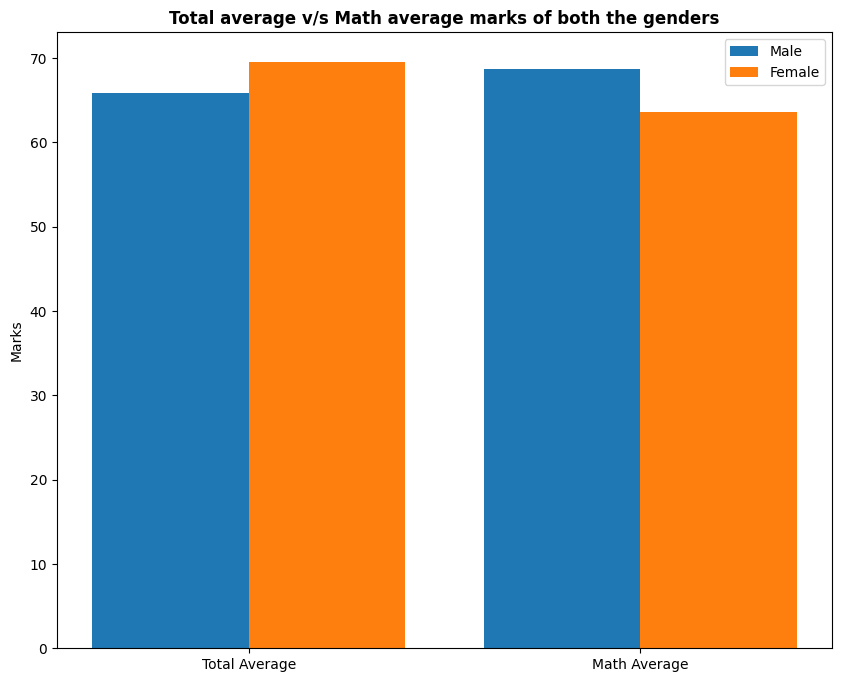

In [149]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders",
          fontweight='bold')
plt.legend()
plt.show()



#### Insights
1. Females have better score than males in terms of overall score.
2. Males have better score than females in terms of math score.

#### UNIVARIATE ANALYSIS(How is groupwise distribution)


In [157]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [159]:
df['race_ethnicity'].value_counts().index

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race_ethnicity')

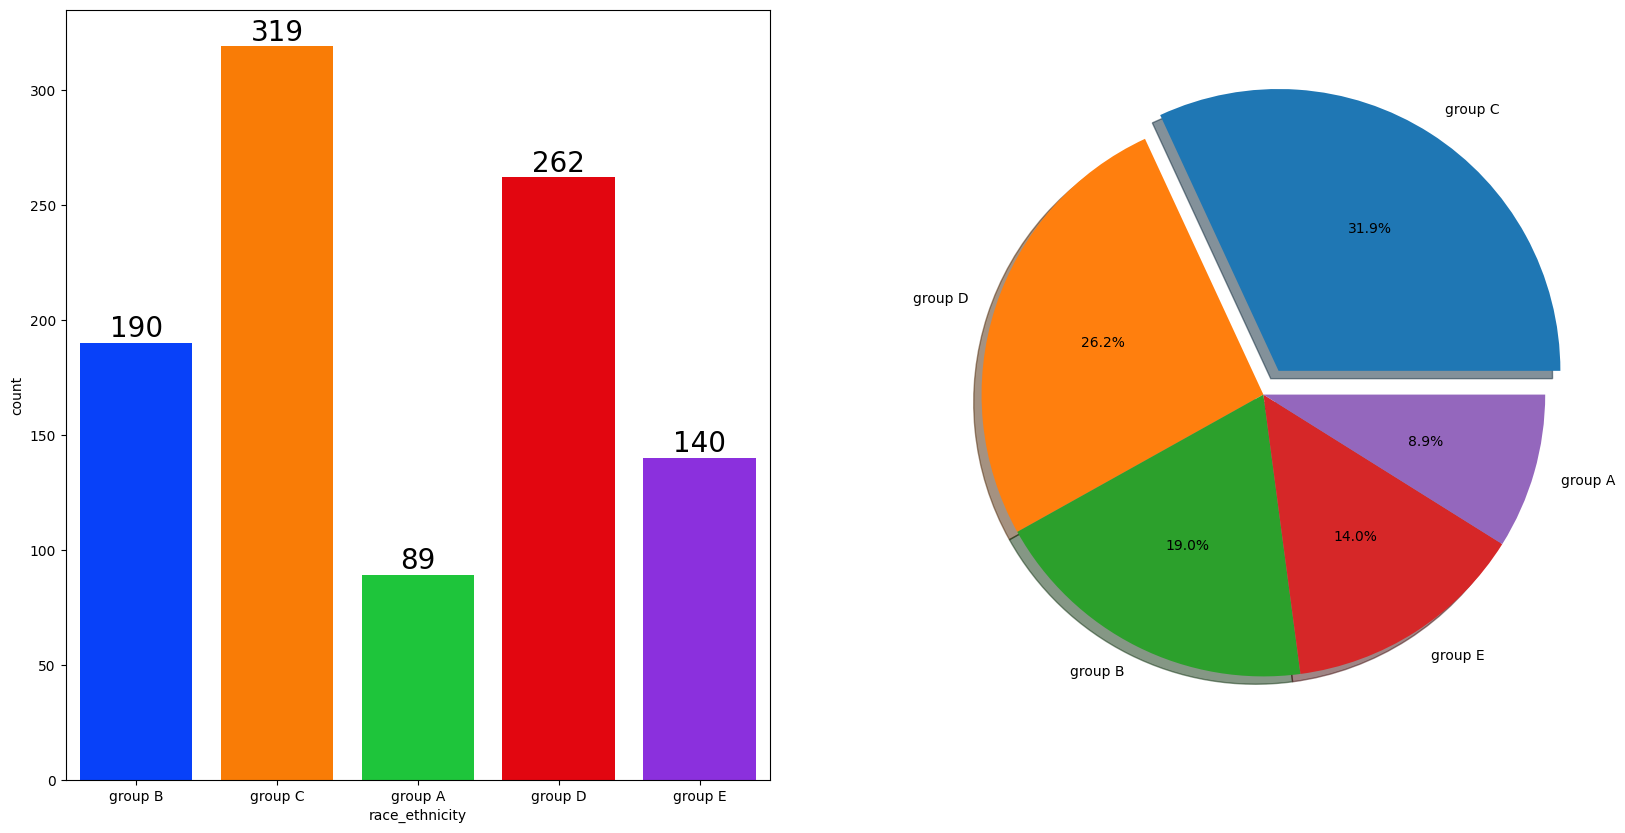

In [168]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

#### Insights
1. There are more number of students in Group C and Group D.
2. Lowest number of people belongs to Group A.

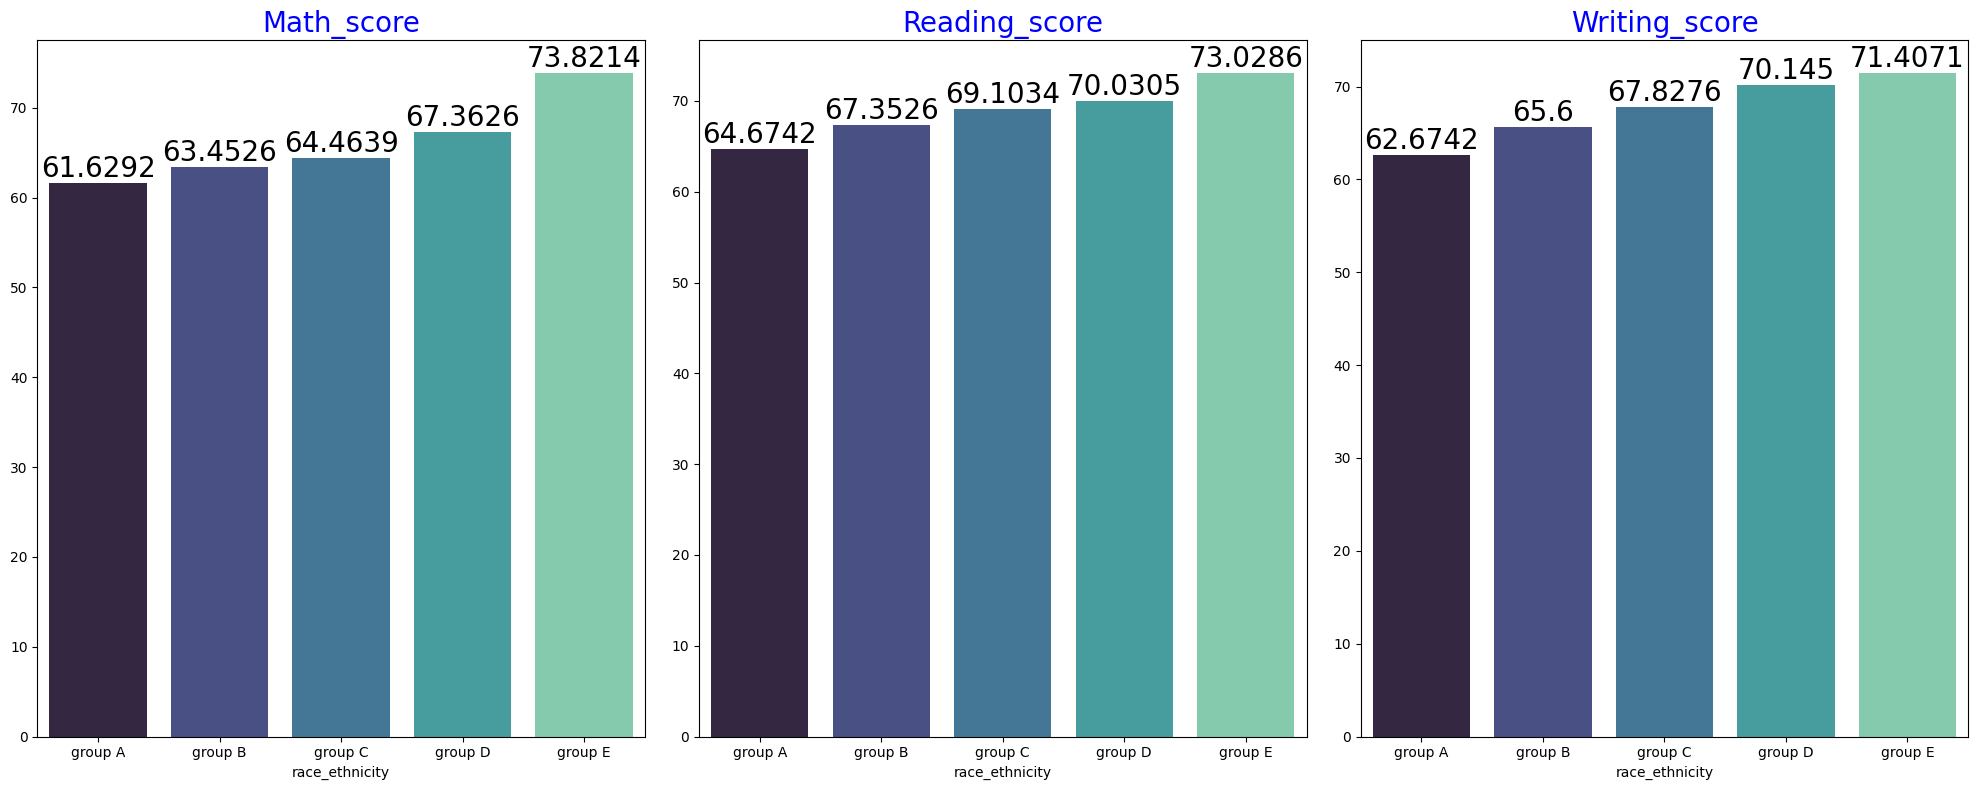

In [177]:
group_data = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3, figsize=(20,8))

sns.barplot(x=group_data['math_score'].mean().index, y=group_data['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math_score', color='blue', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.barplot(x=group_data['reading_score'].mean().index, y=group_data['reading_score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading_score', color='blue', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

sns.barplot(x=group_data['writing_score'].mean().index, y=group_data['writing_score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Writing_score', color='blue', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()


#### Insights
In overall, Group E is perform well when compare with other groups.
whereas Group A performed worse in all three subjects.

### PARENTAL LEVEL OF EDUCATION COLUMN
1. What is educational background of student's parent?
2. Is parental education has any impact on student's performance.


##### UNIVARIATE ANALYSIS(What is educational background of student's parent?)

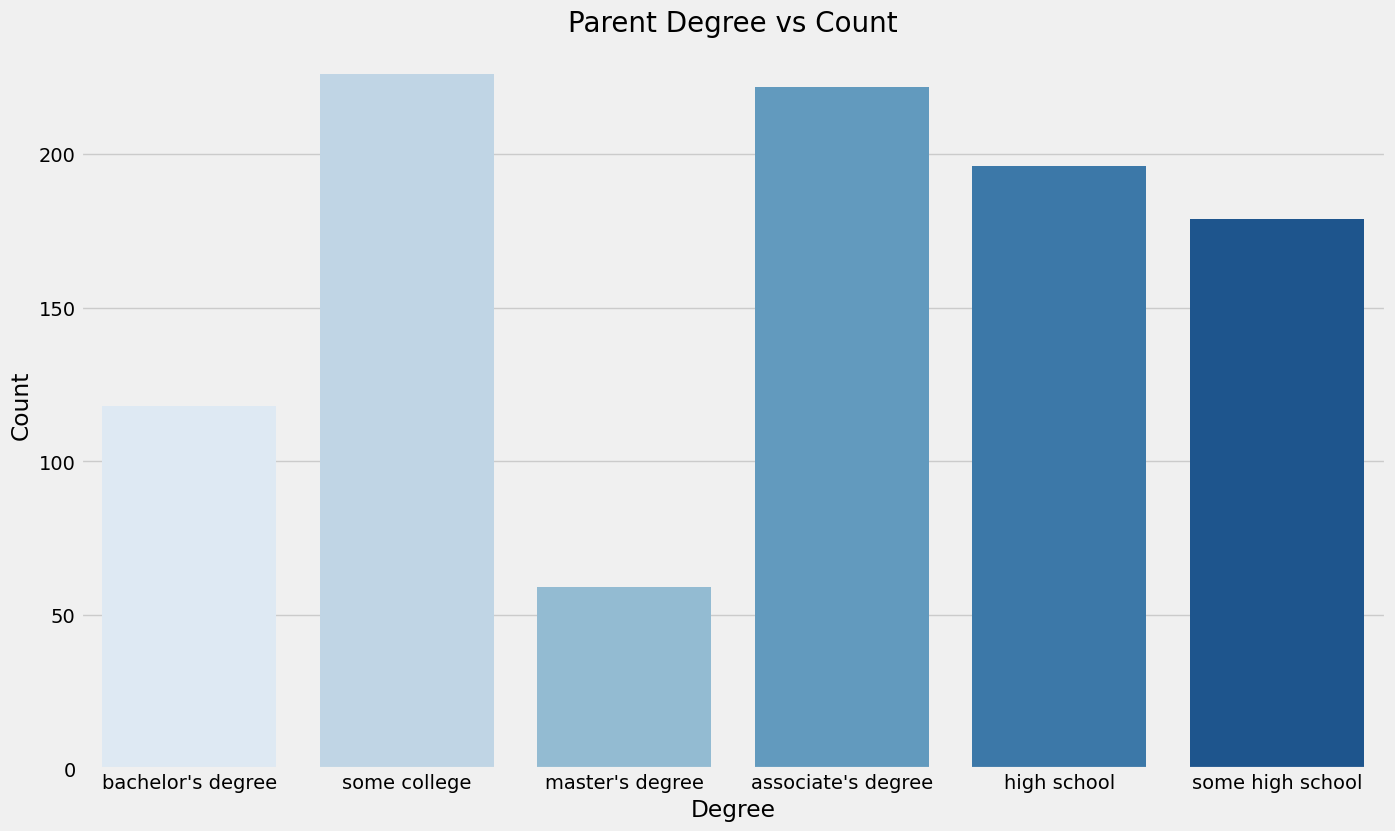

In [191]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Parent Degree vs Count', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights
Majoirty of the students parents went to some college.

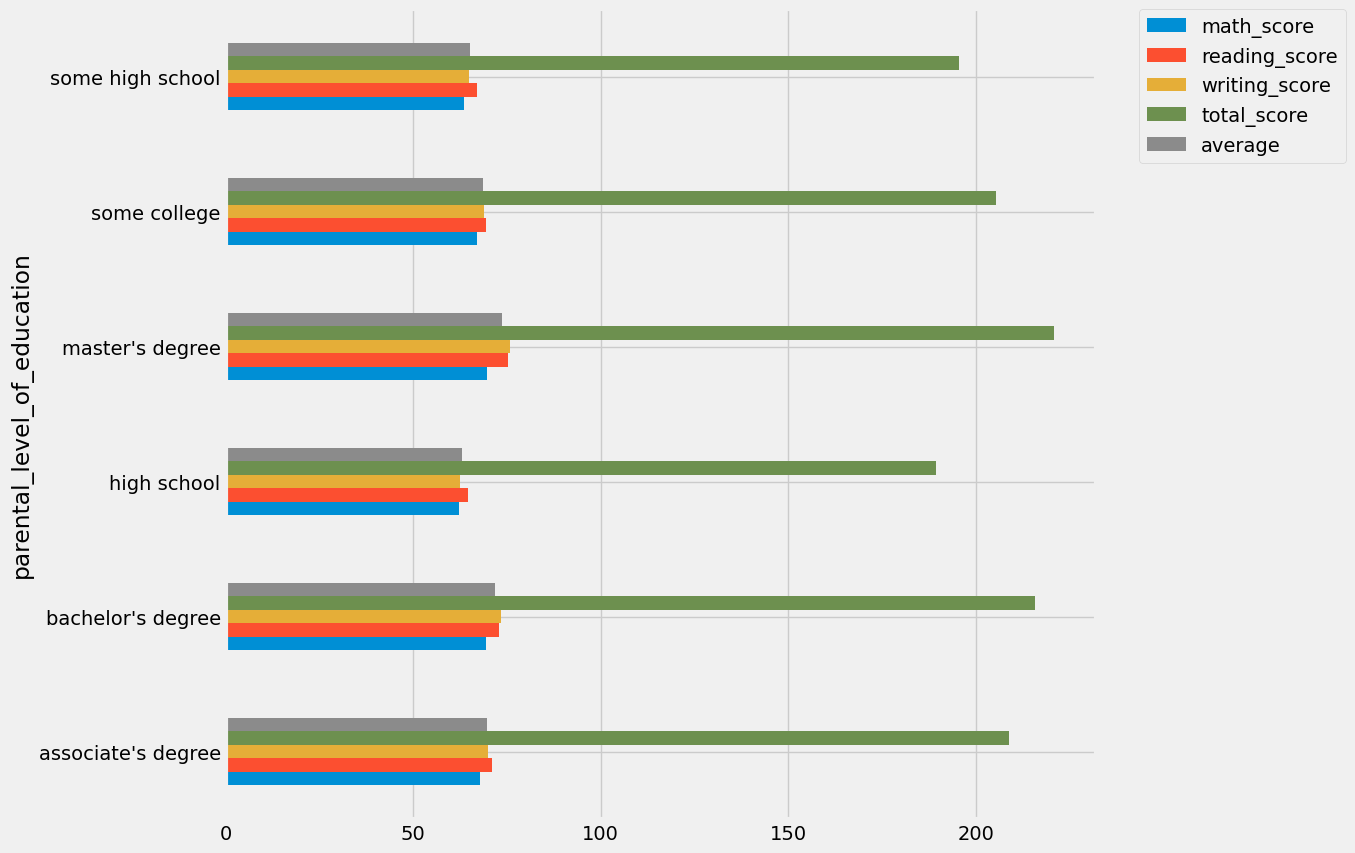

In [193]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
1. Students parents having master degree has got high score.
2. Students parents having high school qualification got low total score compared with others.

##### LUNCH COLUMN
1. Which type of lunch is common among students?
2. What is the effect of lunch type in test results?

In [195]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


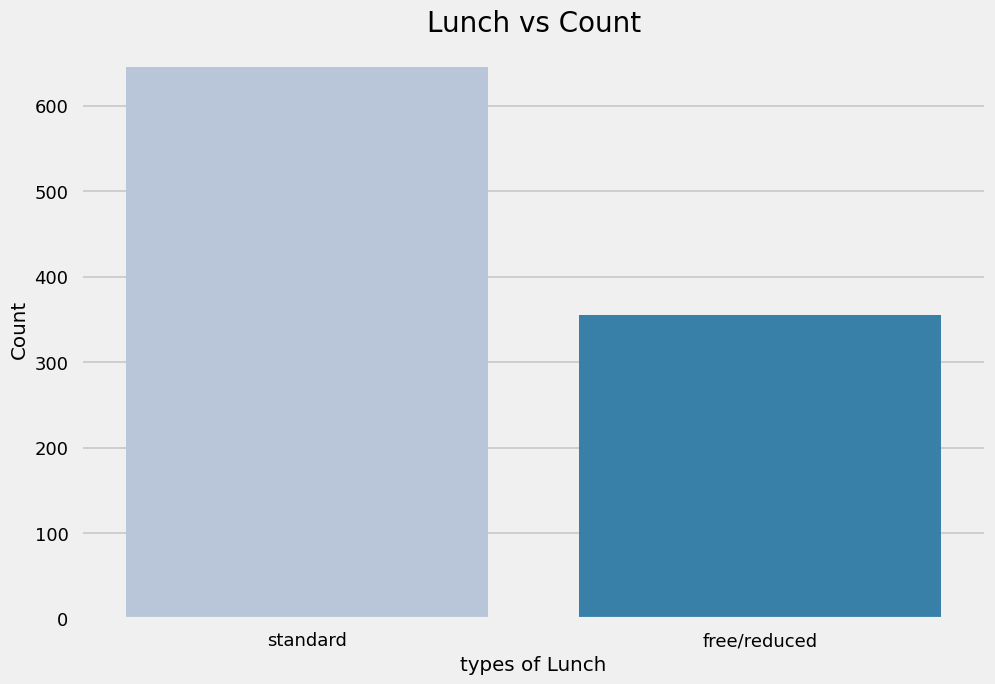

In [205]:
plt.rcParams['figure.figsize'] = (10,7)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Lunch vs Count', fontweight=30, fontsize=20)
plt.xlabel('types of Lunch')
plt.ylabel('Count')
plt.show()

##### Insigths
1. Majority of the students are having standard lunch.

##### BIVARIATE ANALYSIS(Is lunch type intake has any impact on the student's performance?)

In [206]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [207]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

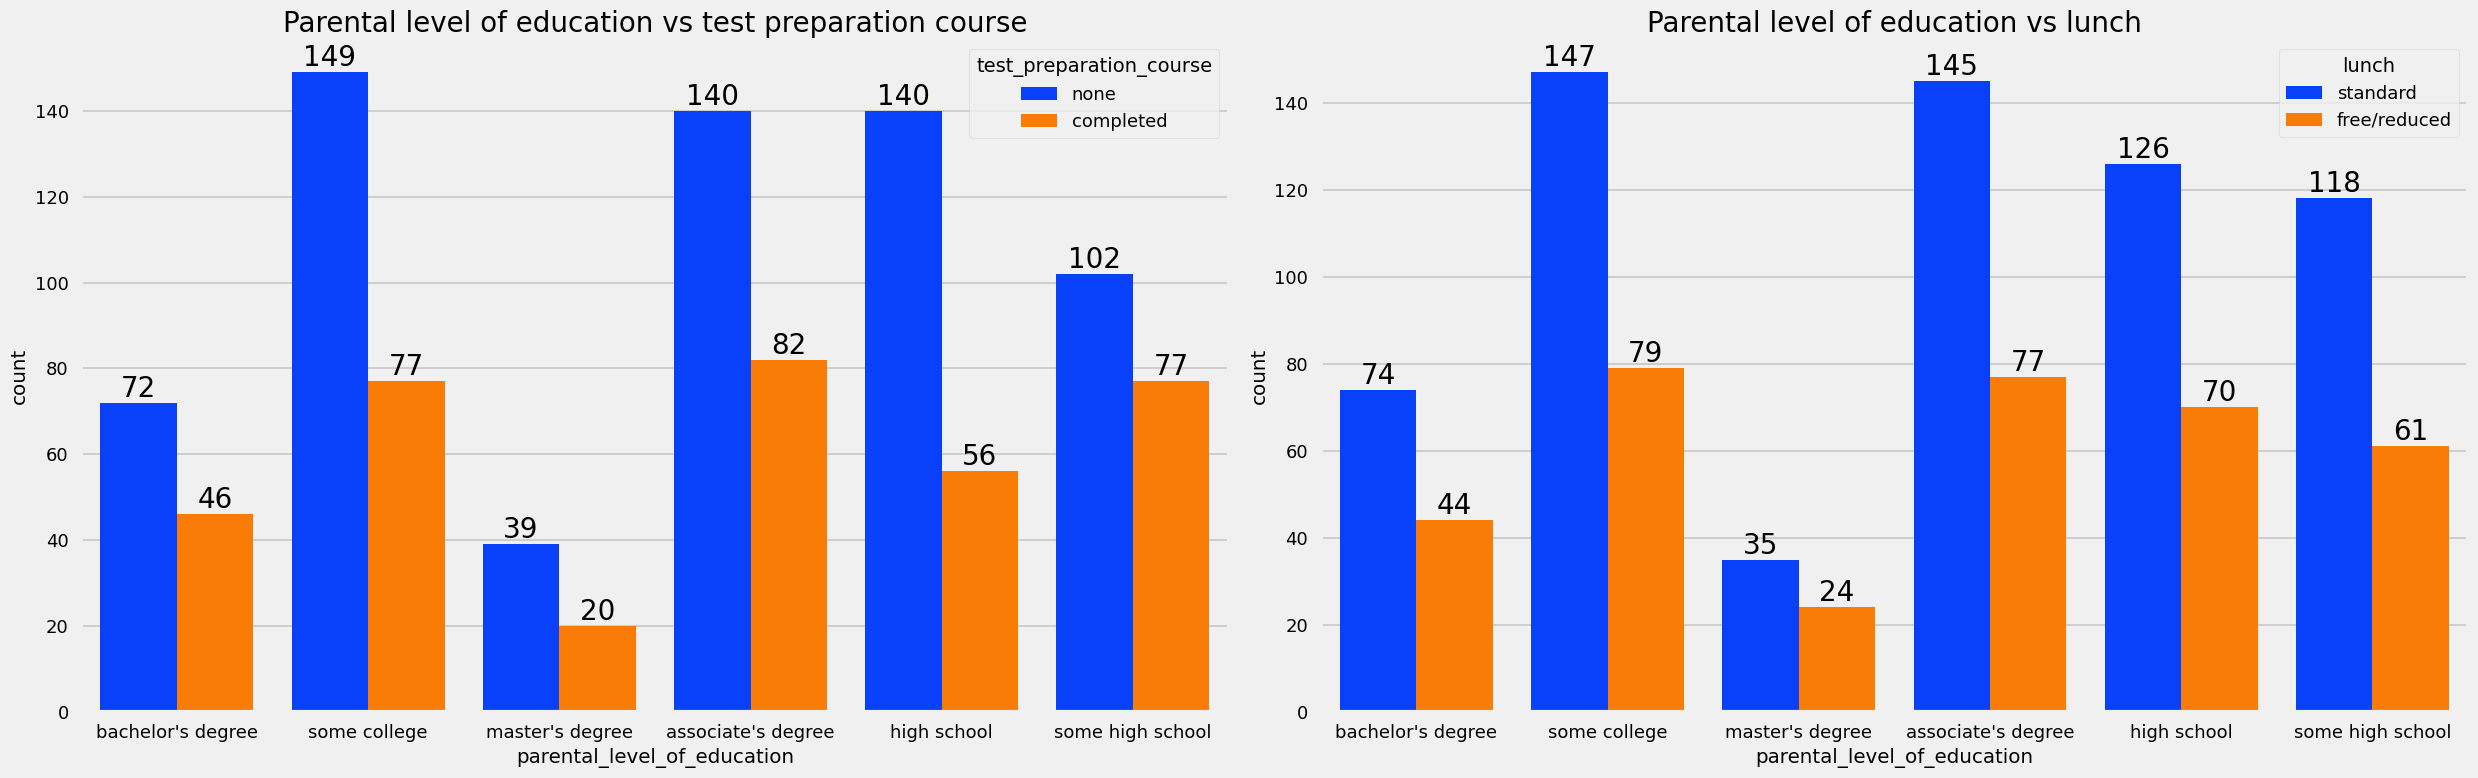

In [230]:
f,ax = plt.subplots(1,2,figsize=(25,8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright',hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Parental level of education vs test preparation course', color='black', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Parental level of education vs lunch', color='black', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)
plt.tight_layout()
plt.show()
    

##### BIVARIATE ANALYSIS(Is test presparation has any impact on student performance)

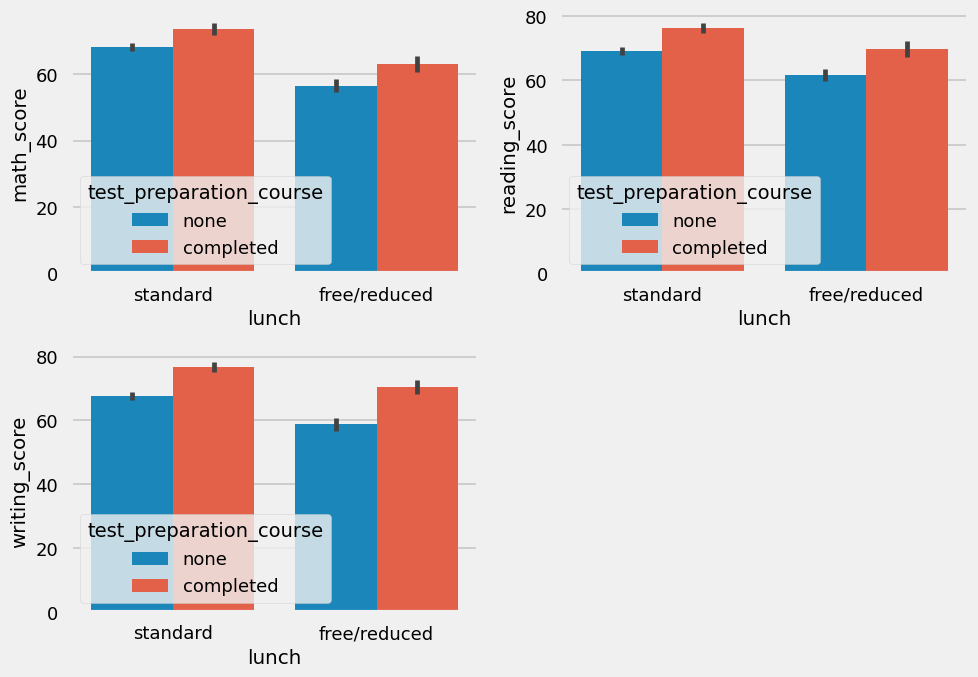

In [236]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'] )
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.tight_layout()
plt.show()



#### Insights
Student have completed the test preparation course performed well in all 3 categories than those not completed the course.

### Checking Outliers.

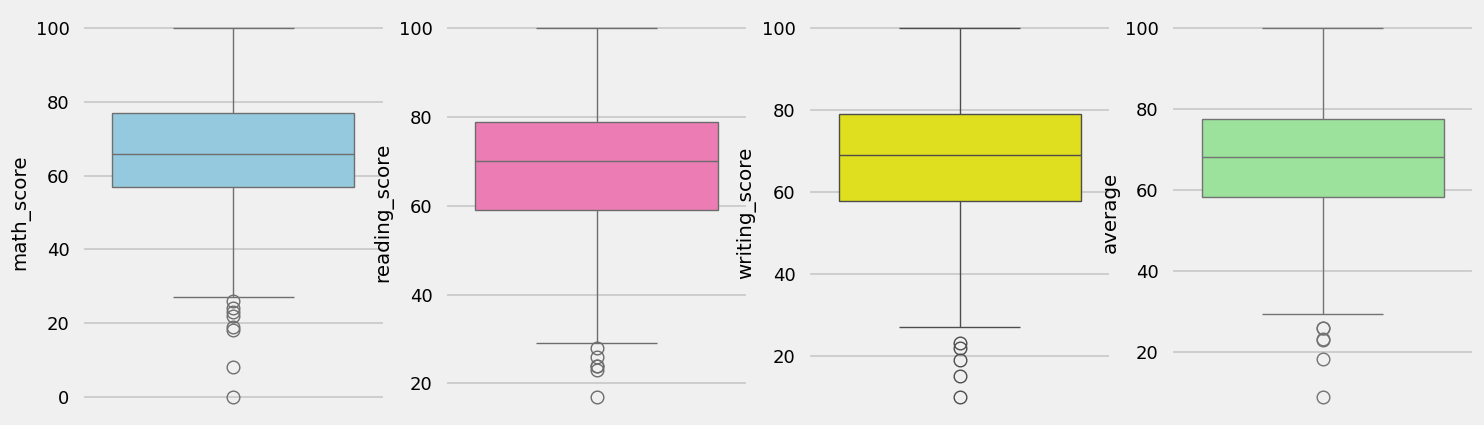

In [245]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'], color='lightgreen')
plt.show()

MULTIVARIATE ANALYSIS USING PAIRPLOT.

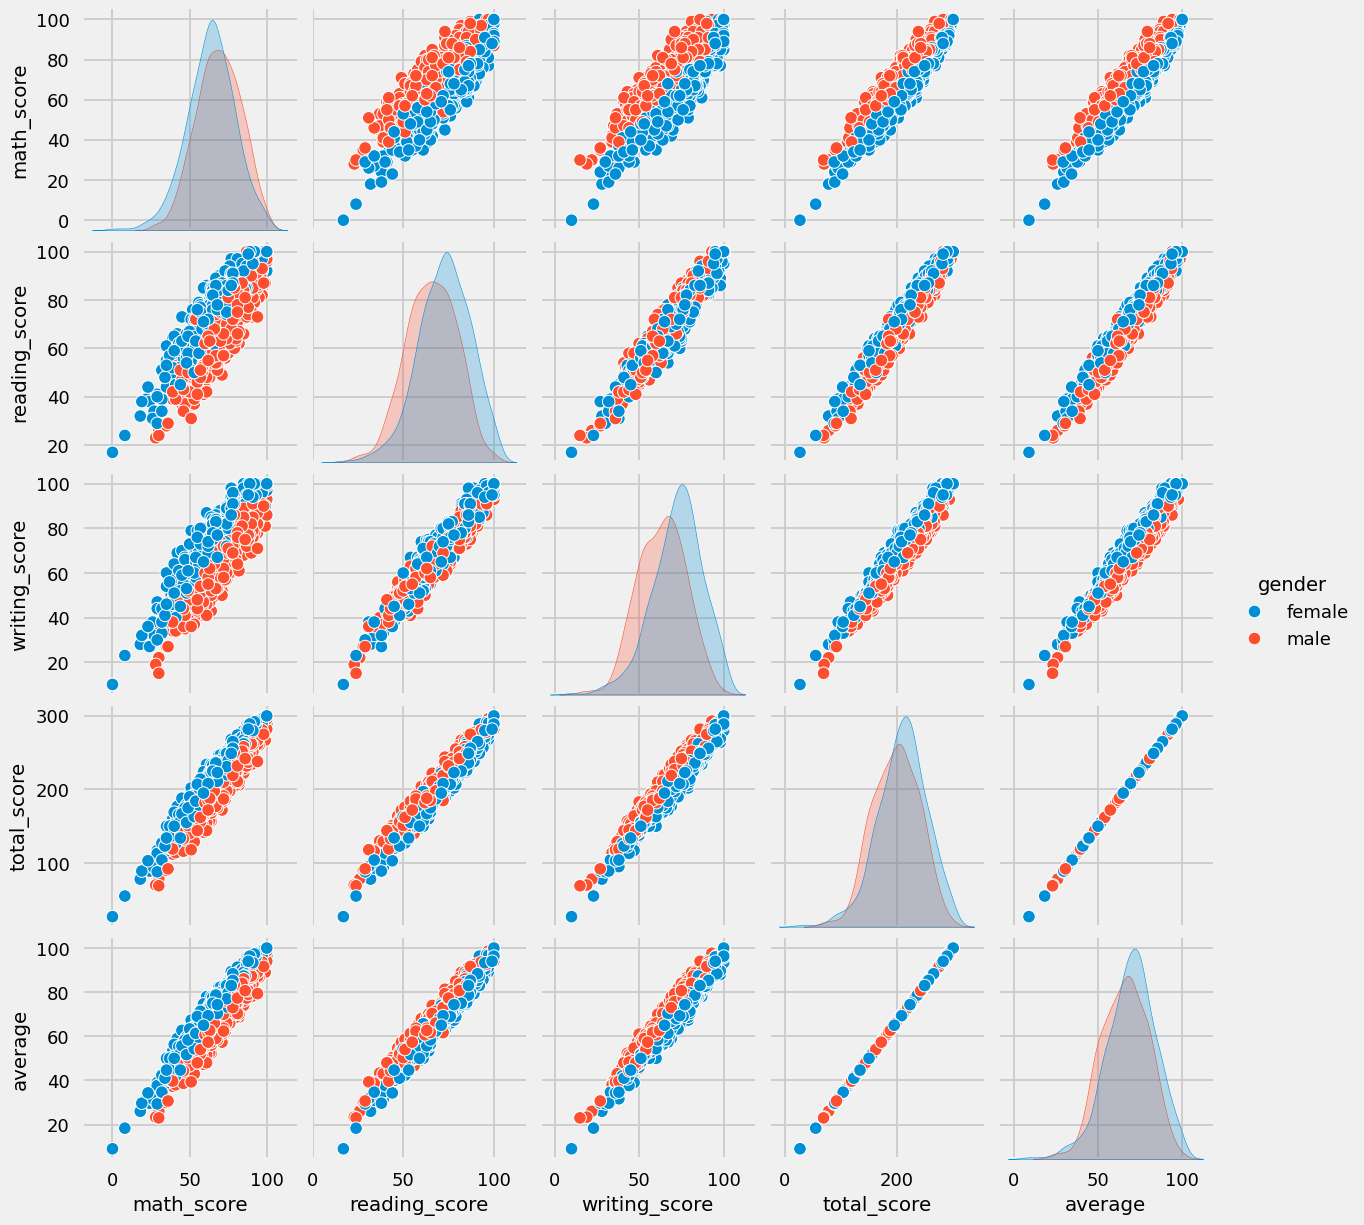

In [246]:
sns.pairplot(df, hue='gender')
plt.show()

### Conclusions
1. Student performance is related with lunch, race parental level education.
2. Females lead in pass percentage and also are top-scorers.
3. Student performance is not much related with test preparation course.
4. Finishing prepration course is benefitial.